In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
n_iti = 13 #Number of experiment iterations/number of data files

In [3]:
data = pd.DataFrame(pytry.read('theta15_batch'))
data = data.reset_index(drop=True)
list = [col for col in data if col.startswith('output')]
for i in list:
    data2=data[i].apply(pd.Series)
    data[i]=data2.iloc[:,1]
data

,classify_aim,classify_test,classify_train,len_train,n_dims,n_epoch,output_aim0000,output_aim0001,output_aim0002,output_aim0003,...,output_train9992,output_train9993,output_train9994,output_train9995,output_train9996,output_train9997,output_train9998,output_train9999,p_seed,seed
0,0.525,0.3020,0.85310,500,2,2,[-0.03678271],[-0.03330736],[-0.0249887],[-0.01869108],...,[0.67663799],[0.62775641],[0.56400986],[0.41021882],[0.31059646],[0.26690688],[0.21110888],[0.11343346],0,0
1,0.294,0.3885,0.80430,500,2,2,[0.03169563],[0.07251411],[0.11364551],[0.15823389],...,[0.98402026],[1.04536697],[1.00310254],[0.945878],[0.92260325],[0.89443498],[0.86439593],[0.82417255],1,1
2,0.272,0.2420,0.87915,500,2,2,[0.43278471],[0.42334521],[0.38135521],[0.28116193],...,[1.03550425],[0.86541098],[0.78143521],[0.65353459],[0.51660097],[0.33279144],[-0.01709226],[-0.29141319],2,2
3,0.638,0.6940,0.86545,500,2,2,[0.4283354],[0.42936808],[0.43017685],[0.42647466],...,[0.26639809],[0.25807067],[0.26268653],[0.28125359],[0.33328852],[0.36828229],[0.39134279],[0.40708225],3,3
4,0.608,0.3175,0.90620,500,2,2,[-0.44300502],[-0.59044088],[-0.68997068],[-0.78119305],...,[0.74148769],[0.7266339],[0.72433938],[0.73087511],[0.68953477],[0.66667157],[0.62441075],[0.61989254],4,4
5,0.565,0.2825,0.86250,500,2,2,[0.76798969],[0.74858831],[0.74973397],[0.74669559],...,[0.75440577],[0.78576246],[0.74606924],[0.74137776],[0.73465998],[0.73778785],[0.71037523],[0.71541719],5,5
6,0.485,0.3675,0.89475,500,2,2,[0.17539283],[0.18753508],[0.10016202],[0.03899823],...,[0.71166503],[0.75452089],[0.76365994],[0.73875626],[0.69034941],[0.66205642],[0.66815872],[0.65968793],6,6
7,0.582,0.1605,0.83195,500,2,2,[0.10777846],[0.0818646],[0.08025842],[0.07971365],...,[0.69943638],[0.61190859],[0.37823081],[0.27307758],[0.19105637],[0.17835226],[-0.03205661],[-0.1685888],7,7
8,0.362,0.2820,0.84020,500,2,2,[-0.60297085],[-0.60278706],[-0.61288204],[-0.62004856],...,[1.00369115],[0.9853295],[0.9396394],[0.87861894],[0.79433956],[0.73081417],[0.65309345],[0.59990131],8,8
9,0.484,0.1810,0.83350,500,2,2,[0.86994844],[0.86404974],[0.86428517],[0.86284844],...,[0.32214948],[0.27473567],[0.2010323],[0.13060087],[0.08819288],[0.0469893],[0.0155043],[0.01487093],9,9


In [4]:
list = [col for col in data if col.startswith('output_train')]
print(len(list))
list = [col for col in data if col.startswith('output_test')]
print(len(list))
list = [col for col in data if col.startswith('output_aim')]
print(len(list))

20000
2000
1000


Text(0.5,1,'noplay training')

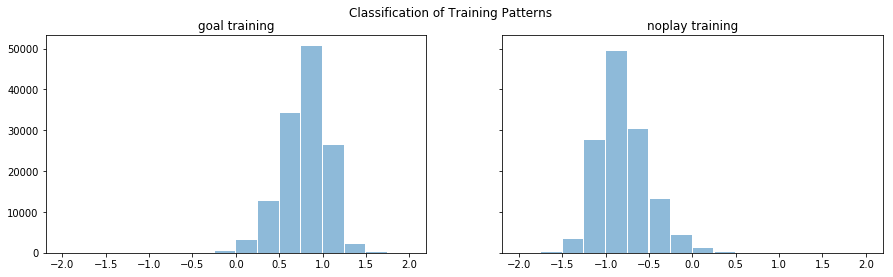

In [5]:
goal_training = pd.DataFrame({'goal_training': pd.concat([eval('data.output_train%04d' % i) for i in range(10000)])})
noplay_training = pd.DataFrame({'noplay_training': pd.concat([eval('data.output_train%04d' % i) for i in range(10000,20000)])})
                               
                                
goal_train = []
for i in range(len(goal_training)):
    a = goal_training.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train.append(a)
goal_train = np.asarray(goal_train)
                                
noplay_train = []
for i in range(len(noplay_training)):
    a = noplay_training.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train.append(a)
noplay_train = np.asarray(noplay_train)
     
bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist(goal_train, bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(noplay_train, bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

Text(0.5,1,'noplay testing')

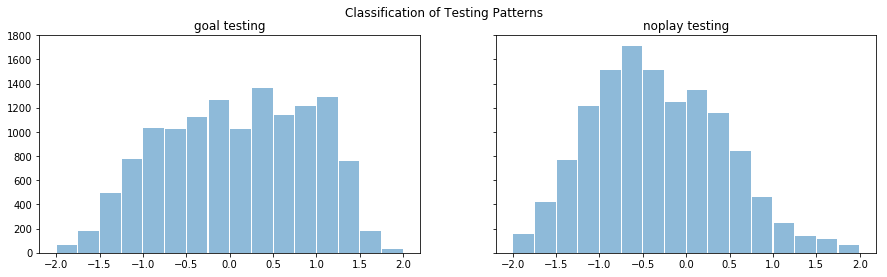

In [6]:
goal_testing = pd.DataFrame({'goal_testing': pd.concat([eval('data.output_test%04d' % i) for i in range(1000)])})
noplay_testing = pd.DataFrame({'noplay_testing': pd.concat([eval('data.output_test%04d' % i) for i in range(1000,2000)])})

goal_test = []
for i in range(len(goal_testing)):
    a = goal_testing.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test.append(a)
goal_test = np.asarray(goal_test)
                                
noplay_test = []
for i in range(len(noplay_testing)):
    a = noplay_testing.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test.append(a)
noplay_test = np.asarray(noplay_test)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Testing Patterns')
ax1.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.5, label='goal testing')
ax1.set_title('goal testing')
ax2.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.5, label='noplay testing')
ax2.set_title('noplay testing')

Text(0.5,1,'aimless testing')

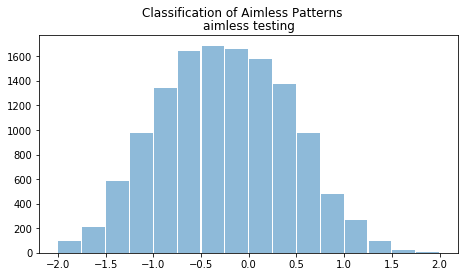

In [7]:
aimless = pd.DataFrame({'aimless_testing': pd.concat([eval('data.output_aim%04d' % i) for i in range (1000)])})

aim_test = []
for i in range(len(aimless)):
    a = aimless.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test.append(a)
aim_test = np.asarray(aim_test)

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(aim_test, bins=bins, rwidth=0.95, alpha=0.5, label='aimless testing')
ax1.set_title('aimless testing')

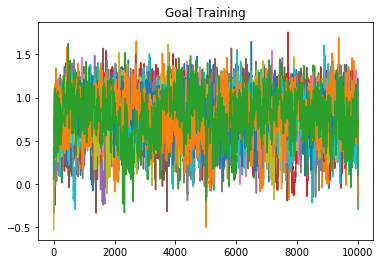

In [8]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Training') #%d' % i) 
    plt.plot(x,goal_training[i::n_iti])

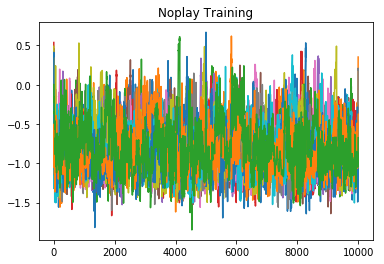

In [9]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Noplay Training')# %d' % i) 
    plt.plot(x,noplay_training[i::n_iti])

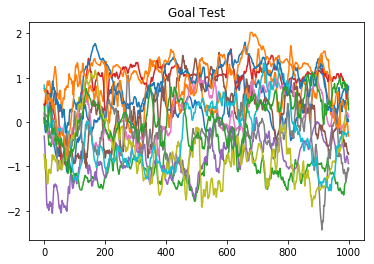

In [10]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Test')# %d' % i) 
    plt.plot(x,goal_test[i::n_iti])

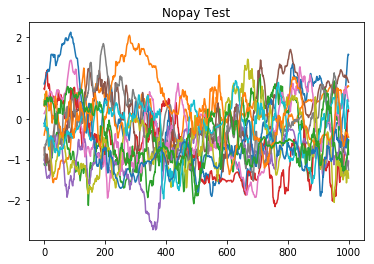

In [11]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Nopay Test')# %d' % i) 
    plt.plot(x,noplay_test[i::n_iti])

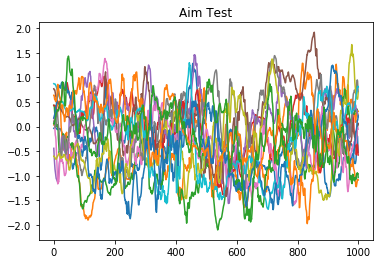

In [12]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Aim Test')# %d' % i) 
    plt.plot(x,aim_test[i::n_iti])

# Report Average Output Every Second

Text(0.5,1,'noplay training')

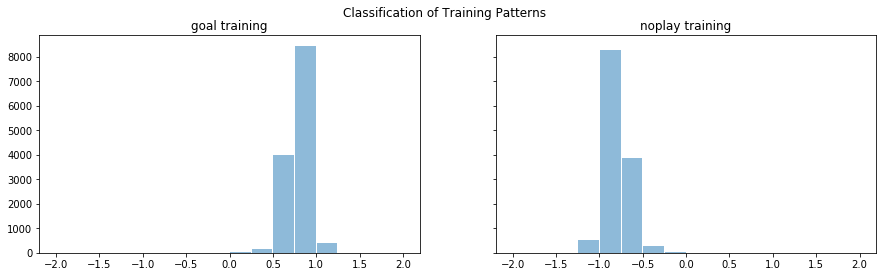

In [13]:
goal_training=goal_training.sort_index()
noplay_training=noplay_training.sort_index()

goaltrain_means = np.mean(goal_training.values.reshape(-1, 10), axis=1) #10000/1000=10 so ave every 10 values
noplaytrain_means = np.mean(noplay_training.values.reshape(-1, 10), axis=1) #10000/1000=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist(np.hstack(goaltrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(np.hstack(noplaytrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

Text(0.5,1,'noplay testing')

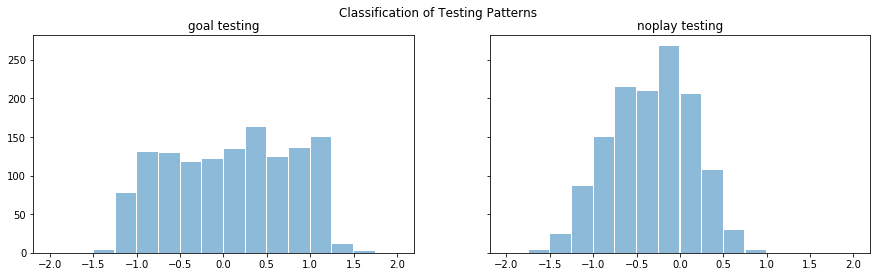

In [14]:
goal_testing=goal_testing.sort_index()
noplay_testing=noplay_testing.sort_index()

goaltest_means = np.mean(goal_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values
noplaytest_means = np.mean(noplay_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Testing Patterns')
ax1.hist(np.hstack(goaltest_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal testing')
ax1.set_title('goal testing')
ax2.hist(np.hstack(noplaytest_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay testing')
ax2.set_title('noplay testing')

Text(0.5,1,'aimless testing')

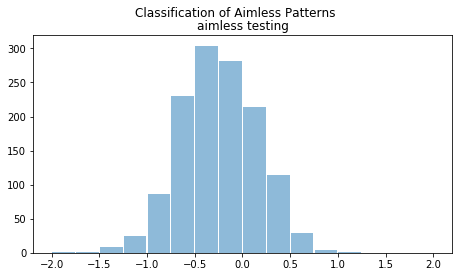

In [15]:
aimless=aimless.sort_index()

aimless_means = np.mean(aimless.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(np.hstack(aimless_means), bins=bins, rwidth=0.95, alpha=0.5, label='aimless testing')
ax1.set_title('aimless testing')

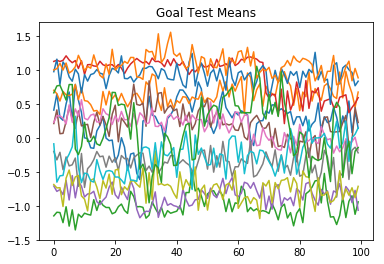

In [16]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Goal Test Means')# %d' % i) 
    plt.plot(x,goaltest_means[s:e:])

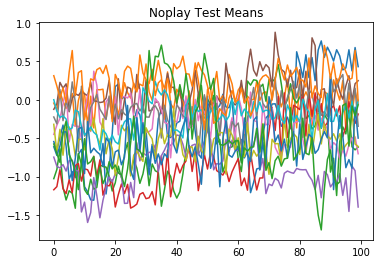

In [17]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Noplay Test Means')# %d' % i) 
    plt.plot(x,noplaytest_means[s:e:])

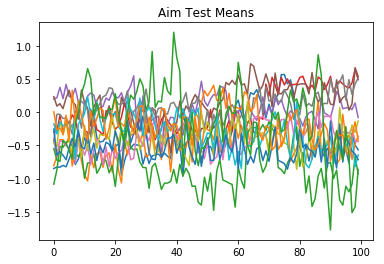

In [18]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Aim Test Means')# %d' % i) 
    plt.plot(x,aimless_means[s:e:])